## This is a notebook for the processing land use data e.g., Urban Atlas in Python.


# Geopandas

[Geopandas](https://geopandas.org) is a Python module that is built on top of [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) extending its functionalities, i.e., all functionalities of pandas works also in geopandas. 

``Geopandas`` has many good built-in spatial processing/analysis features such as overlay analysis, geocoding, spatial aggregation methods.``GeoPandas`` makes working with geospatial data in python easier.

Geometric operations are performed by ``shapely``. 

Geopandas also depends on [fiona](https://fiona.readthedocs.io/en/latest/manual.html#introduction) for file access, and [descartes](https://pypi.org/project/descartes/) + [matplotlib](https://matplotlib.org) for plotting.


You will learn 
- how to read and write spatial data, 
- how to deal with projections in Python using Geopandas 
- how to detect changes across a particular land type over time
- and some useful data management functionalities.

#### Let’s Download Land Use data for Copenhagen 2012

This bit will download a zip file with data for Copenhagen and unzip it into a folder called `Data`.

#### What is `land use` data? 
Land Use data refers to data describing what each piece of land is being used for i.e., the usage of a land parcel in the form of pixels of polygons.

#### What is `Urban Atlas`? 
check [this](https://land.copernicus.eu/local/urban-atlas/urban-atlas-2012?tab=metadata) out! A link to Urban Atlas data at https://land.copernicus.eu/local/urban-atlas 

In [138]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import sys, os
sys.path.append(os.path.abspath('..')) # set default directory where this notebook is running from


#the data is hosted on the European Environment Agency's website, 
# so in case it is missing, you can find it in other websites as well
zipurl = 'https://www.eea.europa.eu/data-and-maps/data/urban-atlas/denmark/dk001l_kobenhavn.zip/at_download/file'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('Data')

Let's open our fresh new shapefile using [geopandas](https://geopandas.org):
Geopandas can read vector data formats e.g., Shapefile, GeoJSON, KML. 

In [139]:
# Import necessary modules 
import geopandas as gpd 
import os

#Set filepath 
fp = "Data/dk001l_kobenhavn/dk001l_kobenhavn.shp" 

# Read file using gpd.read_file() 
data = gpd.read_file(fp)

# you can see what kind of object we have now, which is a GeoPandas' GeoDataFrame
print ("The type of data is", type(data))

# let's preview our data but only the first 5 rows
print(data.head()) 


The type of data is <class 'geopandas.geodataframe.GeoDataFrame'>
      CITIES LUZ_OR_CIT   CODE                                  ITEM  \
0  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
1  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
2  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
3  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
4  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   

  PROD_DATE    SHAPE_LEN    SHAPE_AREA  \
0      2009   267.364043   3886.243449   
1      2009  1314.838061  29226.903814   
2      2009   393.129687   7232.121381   
3      2009   557.687995  15391.472515   
4      2009   308.690214   5949.885216   

                                            geometry  
0  POLYGON ((4461387.187 3583322.185, 4461394.329...  
1  POLYGON ((4461881.407 3584545.952, 4461881.821...  
2  POLYGON ((4463135.744 3584557.919, 4463124.767...  
3  POLYGON ((4462757.186 358

what you see above is land use data and the associated attributes such as `Cities`, `LUZ_OR_CIT`, `city code`, `land use ITEM`, `Production date`, `shape length`, `shape area`, and `Geometry`.

## Let's plot our data
Creating a simple map from a GeoDataFrame ==> use ``.plot()`` -function that creates a map based on data geometries. 

<AxesSubplot:>

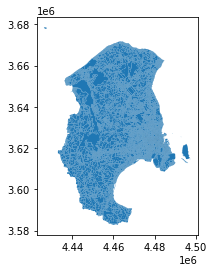

In [140]:
# a quicklook of the geodataframe
%matplotlib inline 

data.plot()

if you'd like to make a bigger plot with more element, try ``help(data.plot)``

<AxesSubplot:>

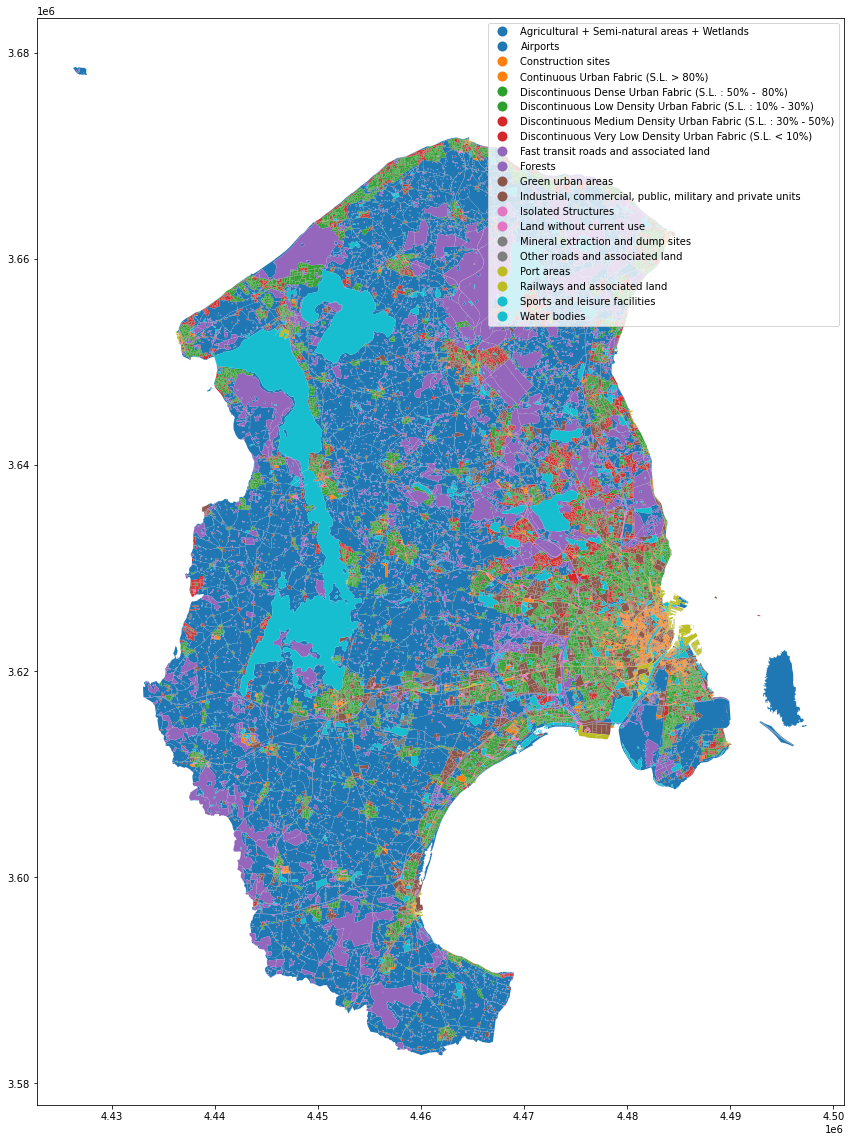

In [141]:
%matplotlib inline

# a bit more decorated
data.plot(figsize=(30, 20), column='ITEM', legend=True, categorical=True)

In [142]:
lc_types=data['ITEM'].unique()
lc_types

array(['Continuous Urban Fabric (S.L. > 80%)',
       'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
       'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
       'Port areas', 'Isolated Structures', 'Green urban areas',
       'Sports and leisure facilities',
       'Agricultural + Semi-natural areas + Wetlands',
       'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
       'Forests',
       'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
       'Industrial, commercial, public, military and private units',
       'Construction sites', 'Water bodies',
       'Mineral extraction and dump sites',
       'Fast transit roads and associated land',
       'Other roads and associated land', 'Railways and associated land',
       'Airports', 'Land without current use'], dtype=object)

## How to write it to a new shapefile

Let’s export first 50 rows of the data into a new Shapefile by first selecting the data and then with ``gpd.to_file()`` -function:

In [143]:
# Set the output path for the data 
outfp = "Data/dk001l_kobenhavn/CPH_airports.shp" 


# Select airports or dense urban
airports = data[data['ITEM']=='Airports'] 
#dense_urban = data[data['ITEM']=='Continuous Urban Fabric (S.L. > 80%)'] 

# Write those rows into a new Shapefile (the default output file format is Shapefile) 
airports.to_file(outfp)

In [147]:
# Set the output path for the data 
outfp = "Data/dk001l_kobenhavn/CPH_Forests.shp" 


# Select forests 
Forests = data[data['ITEM']=='Forests'] 

# Write those rows into a new Shapefile (the default output file format is Shapefile) 
Forests.to_file(outfp)

<AxesSubplot:>

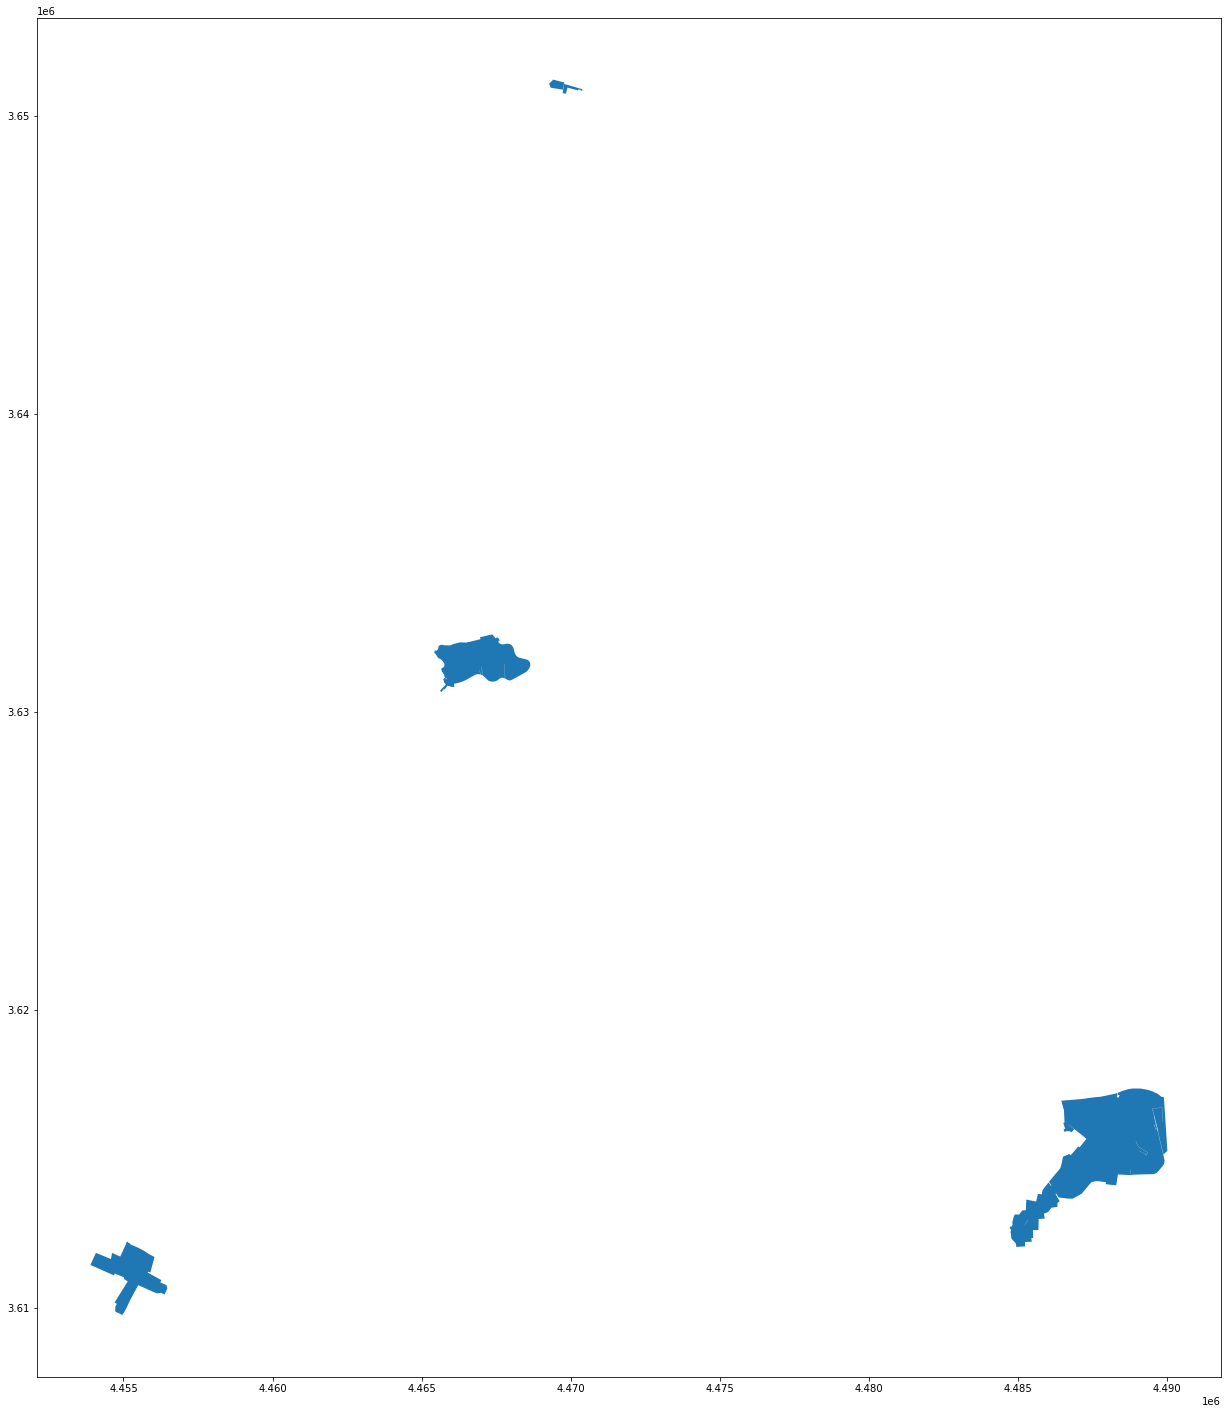

In [144]:
%matplotlib inline

# a bit more decorated
airports.plot(figsize=(50, 25), legend=True, categorical=True)

## 🏋 Exercise

Try extracting dense urban lands and Plot the subset data! Add your code in the cell below. Feel free to become fancy and add a lot more elements to the plot

In [ ]:
# write your code here


let's try and create impervious surface, which should include artifical surfaces

In [148]:
lc_types

array(['Continuous Urban Fabric (S.L. > 80%)',
       'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
       'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
       'Port areas', 'Isolated Structures', 'Green urban areas',
       'Sports and leisure facilities',
       'Agricultural + Semi-natural areas + Wetlands',
       'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
       'Forests',
       'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
       'Industrial, commercial, public, military and private units',
       'Construction sites', 'Water bodies',
       'Mineral extraction and dump sites',
       'Fast transit roads and associated land',
       'Other roads and associated land', 'Railways and associated land',
       'Airports', 'Land without current use'], dtype=object)

In [149]:
# extracting continues urban fabric
imp1= data[data['ITEM']=='Continuous Urban Fabric (S.L. > 80%)']

# extacting Discontinuous Dense Urban Fabric
imp2= data[data['ITEM']=='Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)']

# let's merge these two layers
imp_union=imp1.geometry.append(imp2.geometry)

imp_union

0        POLYGON ((4461387.187 3583322.185, 4461394.329...
1        POLYGON ((4461881.407 3584545.952, 4461881.821...
2        POLYGON ((4463135.744 3584557.919, 4463124.767...
3        POLYGON ((4462757.186 3584686.731, 4462651.426...
4        POLYGON ((4462562.979 3585068.766, 4462555.118...
                               ...                        
11780    POLYGON ((4463836.521 3671279.195, 4463818.249...
11781    POLYGON ((4463788.700 3671249.487, 4463744.670...
11782    POLYGON ((4464295.678 3671612.649, 4464289.879...
11784    POLYGON ((4463890.192 3671603.658, 4464081.970...
11785    POLYGON ((4463522.346 3671716.644, 4463526.395...
Length: 11625, dtype: geometry

<AxesSubplot:>

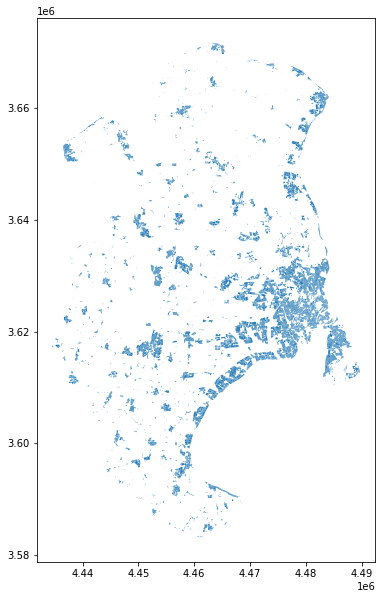

In [151]:
%matplotlib inline

# a bit more decorated
imp_union.plot(figsize=(20, 10))

Since the spatial data is stored as Shapely objects, it is possible to use all of the functionalities of ``Shapely`` module.
Let’s prove that this is really the case by iterating over a sample of the data, and printing the area of first ten polygons.
We can iterate over the rows by using the ``iterrows()`` -function.


In [153]:
# Make a selection that contains only the first five rows 
urban = imp1
selection = urban[0:20] 
# Iterate over rows and print the area of a Polygon 
for index, row in selection.iterrows(): 
    # Get the area of the polygon 
    poly_area = row['geometry'].area 
    # Print information for the user 
    print("Polygon area in m2 at index {index} is: {area:.3f}".format(index=index, area=poly_area))


Polygon area in m2 at index 0 is: 3886.369
Polygon area in m2 at index 1 is: 29228.002
Polygon area in m2 at index 2 is: 7232.469
Polygon area in m2 at index 3 is: 15392.166
Polygon area in m2 at index 4 is: 5950.144
Polygon area in m2 at index 5 is: 9604.369
Polygon area in m2 at index 6 is: 6648.057
Polygon area in m2 at index 7 is: 3904.743
Polygon area in m2 at index 8 is: 2780.388
Polygon area in m2 at index 9 is: 1547.174
Polygon area in m2 at index 10 is: 6120.828
Polygon area in m2 at index 11 is: 7285.498
Polygon area in m2 at index 12 is: 4347.889
Polygon area in m2 at index 13 is: 1466.379
Polygon area in m2 at index 14 is: 30639.492
Polygon area in m2 at index 15 is: 1502.346
Polygon area in m2 at index 16 is: 8281.442
Polygon area in m2 at index 17 is: 7188.866
Polygon area in m2 at index 18 is: 37792.155
Polygon area in m2 at index 19 is: 16189.800


Let’s now create a new column into our GeoDataFrame where we calculate/store the areas of polygons into that column. No need to iterate like before.


In [154]:
# Create a new column called 'area' and assign the area of the Polygons into it 
urban['area'] = urban.area 
# Print first 2 rows of the area column 
print(urban['area'].head(5))


0     3886.368562
1    29228.001584
2     7232.468980
3    15392.166166
4     5950.143575
Name: area, dtype: float64


/Users/jamal/opt/anaconda3/envs/GC/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Let’s get the min, max and mean of areas.


In [155]:
# Maximum area 
max_area = urban['area'].max() 
# Minimum area 
min_area = urban['area'].min() 
# Mean area 
mean_area = urban['area'].mean() 

print("Max area: {max} m2 \nMin area: {min} m2 \nMean area: {mean} m2".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))


Max area: 231933.65 m2 
Min area: 1002.13 m2 
Mean area: 10256.41 m2


let's find them on the map

In [156]:
big_urban = urban[urban['area']==urban['area'].max()] 
small_urban = urban[urban['area']==urban['area'].min()] 


small_urban

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry,area
2710,Kobenhavn,DK001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,149.754858,1002.209908,"POLYGON ((4445343.611 3634950.275, 4445315.471...",1002.13175


In [157]:
big_urban

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry,area
2513,Kobenhavn,DK001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,4732.592485,231902.781886,"POLYGON ((4469965.401 3627088.221, 4469991.508...",231933.65152


<AxesSubplot:>

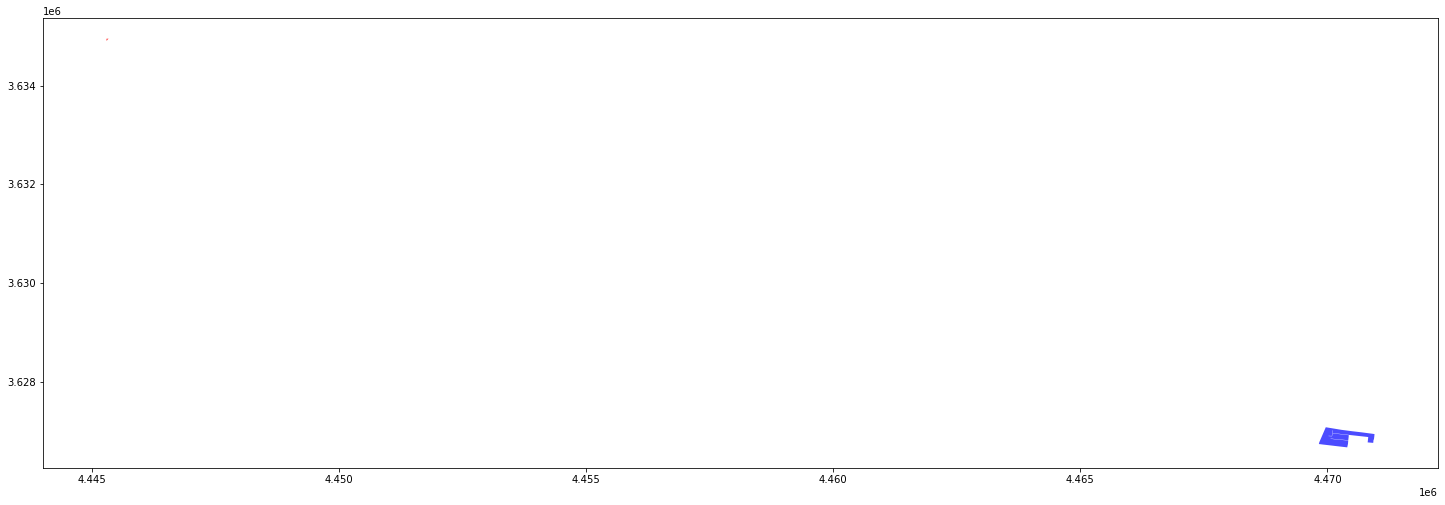

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt

# a bit more decorated
#big_urban.plot(figsize=(50, 25), color= 'red', legend=True, categorical=True)
#small_urban.plot(figsize=(50, 25), color= 'green',legend=True, categorical=True)

fig, ax = plt.subplots (figsize = (25,25))
big_urban.plot(ax = ax, alpha = 0.7, color = "blue")
small_urban.plot(ax = ax, alpha = 0.7, color = "red") # this one is very tiny at the top left corner in red

# Practical example: Saving multiple Shapefiles

A very useful function that can be used in Pandas/Geopandas is ``.groupby()``, which allows you to group data based on values on selected column(s).
Next we will take a practical example by automating the file export task. 

We will group individual land use types in our ”dk001l_kobenhavn.shp” and export those into separate Shapefiles.
Let’s start from scratch and read the Shapefile into GeoDataFrame:



In [159]:
# Read land use data 
fp = "Data/dk001l_kobenhavn/dk001l_kobenhavn.shp" 
data = gpd.read_file(fp) 

# Print columns 
print(data.columns)

Index(['CITIES', 'LUZ_OR_CIT', 'CODE', 'ITEM', 'PROD_DATE', 'SHAPE_LEN',
       'SHAPE_AREA', 'geometry'],
      dtype='object')


The `TYPE` column in the data contains information about different land use types. With ``.unique()`` -function we can quickly see all different names in that column:


In [160]:
# Print all unique land use types in ‘ITEM' column 
print(data['ITEM'].unique())

['Continuous Urban Fabric (S.L. > 80%)'
 'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)'
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)'
 'Port areas' 'Isolated Structures' 'Green urban areas'
 'Sports and leisure facilities'
 'Agricultural + Semi-natural areas + Wetlands'
 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)' 'Forests'
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)'
 'Industrial, commercial, public, military and private units'
 'Construction sites' 'Water bodies' 'Mineral extraction and dump sites'
 'Fast transit roads and associated land'
 'Other roads and associated land' 'Railways and associated land'
 'Airports' 'Land without current use']


Now we can use that information to group our data and save all individual land use types as separate Shapefiles:


In [161]:
# Group the data by column ‘ITEM’ 
grouped = data.groupby('CODE') 

# Let's see what we have 
grouped


As we can see,``groupby`` -function gives us an object called `DataFrameGroupBy`, which is similar to list of keys and values (like in a dictionary) that we can iterate over.  

Let’s iterate over the groups and see what our variables key and values contain

In [162]:
# Iterate over the group object 
for key, values in grouped: 
    individual_LU = values 
    
# Let's see what is the LAST item and key that we iterated 
print('number of records:', key)
print(individual_LU)


number of records: 50000
          CITIES LUZ_OR_CIT   CODE          ITEM PROD_DATE    SHAPE_LEN  \
25647  Kobenhavn     DK001L  50000  Water bodies      2009   541.063764   
30939  Kobenhavn     DK001L  50000  Water bodies      2009   766.210454   
31000  Kobenhavn     DK001L  50000  Water bodies      2009   629.664586   
31149  Kobenhavn     DK001L  50000  Water bodies      2009   452.172169   
35809  Kobenhavn     DK001L  50000  Water bodies      2009   485.057720   
...          ...        ...    ...           ...       ...          ...   
38369  Kobenhavn     DK001L  50000  Water bodies      2009  1631.672631   
38370  Kobenhavn     DK001L  50000  Water bodies      2009   494.848134   
38371  Kobenhavn     DK001L  50000  Water bodies      2009   565.917314   
38372  Kobenhavn     DK001L  50000  Water bodies      2009  1181.548809   
38373  Kobenhavn     DK001L  50000  Water bodies      2009   432.740728   

         SHAPE_AREA                                           geometry  
2

Finally, let’s  export all individual LU types into separate Shapefiles:


In [163]:
# Specify output directory 
out_directory = "dk001l_kobenhavn" 

# Create a new folder called 'Results’ 
result_folder = os.path.join(out_directory, 'Results') 

# Check if the folder exists already 
if not os.path.exists(result_folder): 
# If it does not exist, create one 
    os.makedirs(result_folder) 
# Iterate over the groups 

for key, values in grouped: 
# Format the filename (replace spaces with underscores using 'replace()'-function) 
    output_name = "%s.shp" % key.replace(" ", "_") 
# Print some information for the user 
    print("Processing: %s" % key) 
# Create an output path 
    outpath = os.path.join(result_folder, output_name) 
# Export the data 
    values.to_file(outpath)


Processing: 11100
Processing: 11210
Processing: 11220
Processing: 11230
Processing: 11240
Processing: 11300
Processing: 12100
Processing: 12210
Processing: 12220
Processing: 12230
Processing: 12300
Processing: 12400
Processing: 13100
Processing: 13300
Processing: 13400
Processing: 14100
Processing: 14200
Processing: 20000
Processing: 30000
Processing: 50000


# Geometric operations: Overlay analysis

The aim is to make an overlay analysis where we create a new layer based on geometries from a dataset that intersect with geometries of another layer. 
Here, we are going to clip land use features from `dk001l_kobenhavn.shp` within a box `CPH_Box.shp`

Here is a set of functions for overlay analysis.
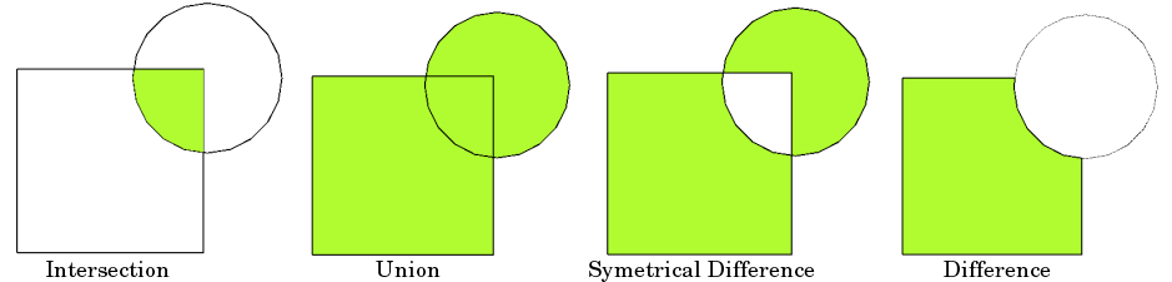




In [164]:
# Coordinates of a bbox in CPH in Decimal Degrees 
import geopandas as gpd 
from shapely.geometry import Point, Polygon  
coordinates = [(12.1, 55.3), (12.9, 55.3), (12.9, 56.0), (12.1, 56.0)] 

# Create a Shapely polygon from the coordinate-tuple list 
poly = Polygon(coordinates) 

# Let's see what we have 
print(poly)

POLYGON ((12.1 55.3, 12.9 55.3, 12.9 56, 12.1 56, 12.1 55.3))


In [172]:
# Create an empty geopandas GeoDataFrame 
newdata = gpd.GeoDataFrame() 

# Let's see what we have at the moment 
print(newdata)

# Insert the polygon into 'geometry' -column at index 0 
newdata.loc[0, 'geometry'] = poly 

# Let's see what we have now 
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []
                                            geometry
0  POLYGON ((12.10000 55.30000, 12.90000 55.30000...


In [176]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = "Copenhagen"
newdata.loc[0, 'Country'] = "Denmark"
newdata.loc[0, 'Continent'] = "Europe"
newdata.loc[0, 'Popo'] = "129293"



# Let's check the data 
print(newdata)

                                            geometry    location  Country  \
0  POLYGON ((12.10000 55.30000, 12.90000 55.30000...  Copenhagen  Denmark   

  Continent    Popo  
0    Europe  129293  


In [179]:
# Import specific function 'from_epsg' from fiona module 
from fiona.crs import from_epsg 

# Set the GeoDataFrame's coordinate system to WGS84: epsg code 4326 
# set the GeoDataFrame's coordinate system to UTM32: epsg code 25832
newdata.crs = from_epsg(4326) 

# Let's see how the crs definition looks like 
print(newdata.crs)


+init=epsg:4326 +no_defs +type=crs


In [180]:
# Determine the output path for the Shapefile 
outfp = "CPH_Box.shp" 

# Write the data into that Shapefile 
newdata.to_file(outfp)


<AxesSubplot:>

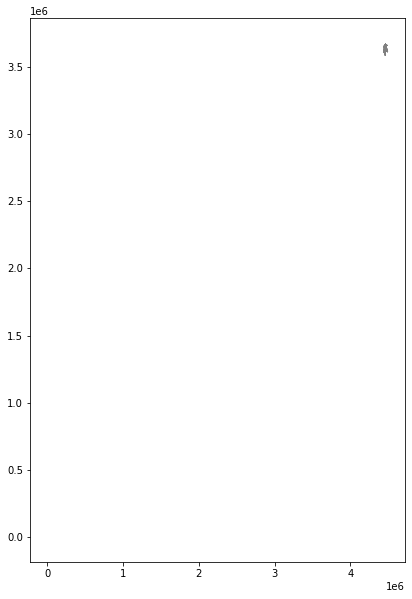

In [181]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# Let's enable speedups to make queries faster
shapely.speedups.enable()

# File paths, make sure you know where you data is 
border_fp = "CPH_Box.shp"

lu_fp = "Data/dk001l_kobenhavn/dk001l_kobenhavn.shp"

# Read files
lu = gpd.read_file(lu_fp)
bbox = gpd.read_file(border_fp)

# Plot the layers and you will see the it looks wierd? why?
ax = lu.plot(figsize=(20, 10),facecolor='grey')
bbox.plot(ax=ax, facecolor='none', edgecolor='red')

In [170]:
# let's check the coordinate system of lu
lu.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.579299533, 24.603629139001, 44.820545196533, 84.722623821813)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azi

In [171]:
# let's check the coordinate system of bbox
bbox.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Here the red area is the borders that we want to use for conducting the overlay analysis and select the geometries from the LU layer.
Always, when conducting GIS operations involving multiple layers, it is required to check that the CRS of the layers match:



In [182]:
# Ensure that the CRS matches, if not raise an AssertionError 
assert bbox.crs == lu.crs, "CRS differs between layers!"

AssertionError: CRS differs between layers!

let's reproject the ``bbox`` geodataframe into the same projection as ``lu``is in


In [183]:
bbox_new = bbox.to_crs(lu.crs)

<AxesSubplot:>

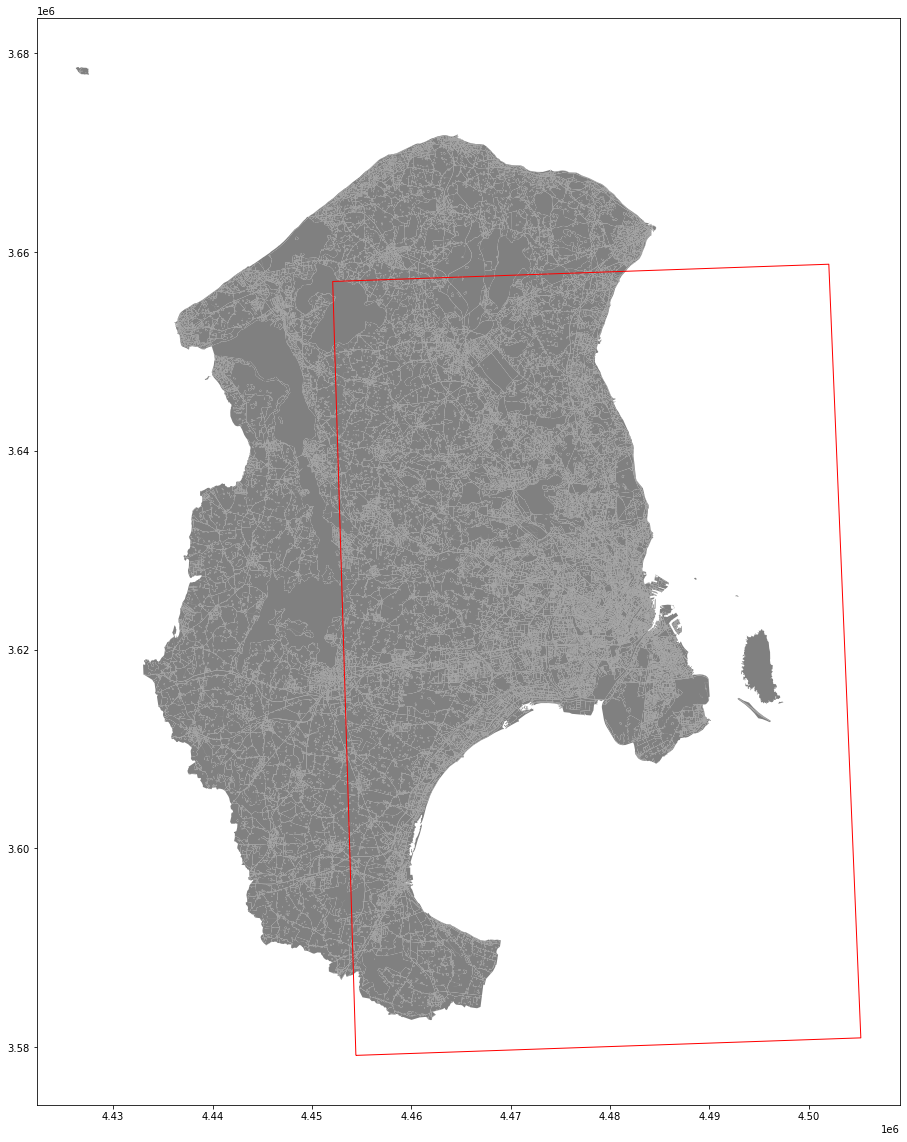

In [184]:
# Plot the layers
ax = lu.plot(figsize=(30, 20),facecolor='grey')
bbox_new.plot(ax=ax, facecolor='None', edgecolor='red')

Let’s do an overlay analysis and create a new layer from polygons of the LU file that intersect with our bbox layer. 

We can use a function called ``overlay()`` to conduct the overlay analysis that takes inputs like
- the GeoDataFrame where the selection is taken, 
- the GeoDataFrame used for making the selection, and 
- parameter how that can be used to control how the overlay analysis is conducted (possible values are `intersection`, `union`, `symmetric_difference`, `difference`, and `identity`).

In [185]:
intersection = gpd.overlay(lu, bbox_new, how='intersection')

In [186]:
help(gpd.overlay)

Help on function overlay in module geopandas.tools.overlay:

overlay(df1, df2, how='intersection', make_valid=True, keep_geom_type=True)
    Perform spatial overlay between two GeoDataFrames.
    
    Currently only supports data GeoDataFrames with uniform geometry types,
    i.e. containing only (Multi)Polygons, or only (Multi)Points, or a
    combination of (Multi)LineString and LinearRing shapes.
    Implements several methods that are all effectively subsets of the union.
    
    Parameters
    ----------
    df1 : GeoDataFrame
    df2 : GeoDataFrame
    how : string
        Method of spatial overlay: 'intersection', 'union',
        'identity', 'symmetric_difference' or 'difference'.
    keep_geom_type : bool
        If True, return only geometries of the same geometry type as df1 has,
        if False, return all resulting gemetries.
    
    Returns
    -------
    df : GeoDataFrame
        GeoDataFrame with new set of polygons and attributes
        resulting from the overlay


Let’s plot it!


<AxesSubplot:>

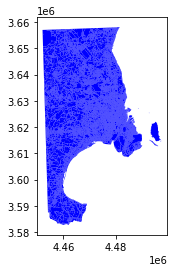

In [187]:
intersection.plot(color="b") 

Let's check whether the attributes are also there!

In [188]:
print(intersection.head()) 

      CITIES LUZ_OR_CIT   CODE                                  ITEM  \
0  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
1  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
2  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
3  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
4  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   

  PROD_DATE    SHAPE_LEN    SHAPE_AREA    location  Country Continent    Popo  \
0      2009   267.364043   3886.243449  Copenhagen  Denmark    Europe  129293   
1      2009  1314.838061  29226.903814  Copenhagen  Denmark    Europe  129293   
2      2009   393.129687   7232.121381  Copenhagen  Denmark    Europe  129293   
3      2009   557.687995  15391.472515  Copenhagen  Denmark    Europe  129293   
4      2009   308.690214   5949.885216  Copenhagen  Denmark    Europe  129293   

                                            geometry  
0  POLYGON ((4461394.329 

==>

Let’s save our result grid as a GeoJSON file that is commonly used file format nowadays for storing spatial data.


In [ ]:
# Output filepath 
outfp = "CPH_LU_Box.geojson" 

# Use GeoJSon driver 
intersection.to_file(outfp, driver='GeoJSON')

You can see what data formats `Fiona` supports  

In [ ]:
import fiona
fiona.supported_drivers

#### What's next? Aggregation

Aggregation means merging Geometries together by some common identifier. Suppose we are interested in studying continents, but we only have country-level data like the country dataset. By aggregation we would convert this into a continent-level dataset.

Here, we will aggregate our land use data by type (column `ITEM`), i.e. the grid cells that have the same land type will be dissolved.

For doing the aggregation we will use a function called ``dissolve()``.

In [ ]:
# Conduct the aggregation 
dissolved = intersection.dissolve(by="ITEM") 
# What did we get 
print(dissolved.head())

In [ ]:
#let's calculate the updated area via the following code --> observe the difference in areal coverage
dissolved['Shape_Area2'] = dissolved['geometry'].area
print(dissolved.head())

Let’s compare the number of cells in the layers before and after the aggregation:


In [ ]:
print('Rows in original intersection GeoDataFrame:', len(intersection))
print('Rows in dissolved layer:', len(dissolved))


What happend? ===>

In [ ]:
print(dissolved.columns) 

Now, we can f.x. select only such geometries from the layer that are namely ”Green urban areas” :


In [ ]:
# Select only geometries that are Green urban areas
sel_green = dissolved.loc['Green urban areas'] 
# See the data type 
print(type(sel_green)) 
# See the data 
print(sel_green.head())



Now, we have a ``Pandas`` Series object containing basically one row from our original aggregated GeoDataFrame. Let’s convert the Series into GeoDataFrame and plot it to see where those green areas are located:


In [ ]:
# Create a GeoDataFrame 
geo = gpd.GeoDataFrame([sel_green.values], crs=dissolved.crs, columns=dissolved.columns) 

# Plot the grid cells that are green
ax = dissolved.plot(facecolor='grey') 
geo.plot(ax=ax, facecolor='green')


## 🏋 Exercise

Select `Industrial, commercial, public, military and private units` geometries and plot them. Add your code below!

In [189]:
#Set filepath and load Urabn Atlas data for 2006 and 2018 as shapefile 
UA06 = "Data2022/UA_2006.shp" 
UA18 = "Data2022/UA_2018.shp" 

# Read file using gpd.read_file() 
data1 = gpd.read_file(UA06)
data2 = gpd.read_file(UA18)

# you can see what kind of object we have now, which is a GeoPandas' GeoDataFrame
print ("The type of data1 is", type(data1))
print ("The type of data2 is", type(data2))

# let's preview our data but only the first 5 rows
print(data1.head()) 


The type of data1 is <class 'geopandas.geodataframe.GeoDataFrame'>
The type of data2 is <class 'geopandas.geodataframe.GeoDataFrame'>
  COUNTRY     CITIES FUA_OR_CIT CODE2006  \
0      DK  København    DK001L2    11100   
1      DK  København    DK001L2    11100   
2      DK  København    DK001L2    11100   
3      DK  København    DK001L2    11100   
4      DK  København    DK001L2    11100   

                                            ITEM2006 PROD_DATE  Shape_Leng  \
0  Continuous urban fabric (S.L. : > 80%)\r\nCont...      2015  327.184222   
1  Continuous urban fabric (S.L. : > 80%)\r\nCont...      2015  170.061698   
2  Continuous urban fabric (S.L. : > 80%)\r\nCont...      2015  387.684337   
3  Continuous urban fabric (S.L. : > 80%)\r\nCont...      2015  653.568750   
4  Continuous urban fabric (S.L. : > 80%)\r\nCont...      2015  482.232431   

     Shape_Area                                           geometry  
0   6120.820100  POLYGON ((4453288.952 3589191.227, 4453296.644

In [190]:
print(data2.head()) 

   fid country   fua_name fua_code code_2018  \
0  1.0      DK  København  DK001L2     11220   
1  2.0      DK  København  DK001L2     11210   
2  3.0      DK  København  DK001L2     11210   
3  4.0      DK  København  DK001L2     11210   
4  5.0      DK  København  DK001L2     11210   

                                          class_2018 prod_date     identifier  \
0  Discontinuous medium density urban fabric (S.L...   2020-06  11816-DK001L2   
1  Discontinuous dense urban fabric (S.L. : 50% -...   2020-06   6271-DK001L2   
2  Discontinuous dense urban fabric (S.L. : 50% -...   2020-06   5640-DK001L2   
3  Discontinuous dense urban fabric (S.L. : 50% -...   2020-06   6973-DK001L2   
4  Discontinuous dense urban fabric (S.L. : 50% -...   2020-06   7738-DK001L2   

     perimeter           area comment  Pop2018  \
0   281.985172    4778.321045    None       15   
1  8462.944932  282764.709119    None      131   
2  3693.692266   83629.268948    None      325   
3   426.180020   11081.2

We are going to do some change detection over time by monitoring the changes in 'urban green areas'

In [193]:
# let's dissolve the two layers according to their land types (ITEM and class)

dissolved1 = data1.dissolve(by="ITEM2006") 
dissolved2 = data2.dissolve(by="class_2018") 

# Select only geometries that are Green urban areas
sel_green1 = dissolved1.loc['Green urban areas'] 
sel_green2 = dissolved2.loc['Green urban areas'] 

<AxesSubplot:>

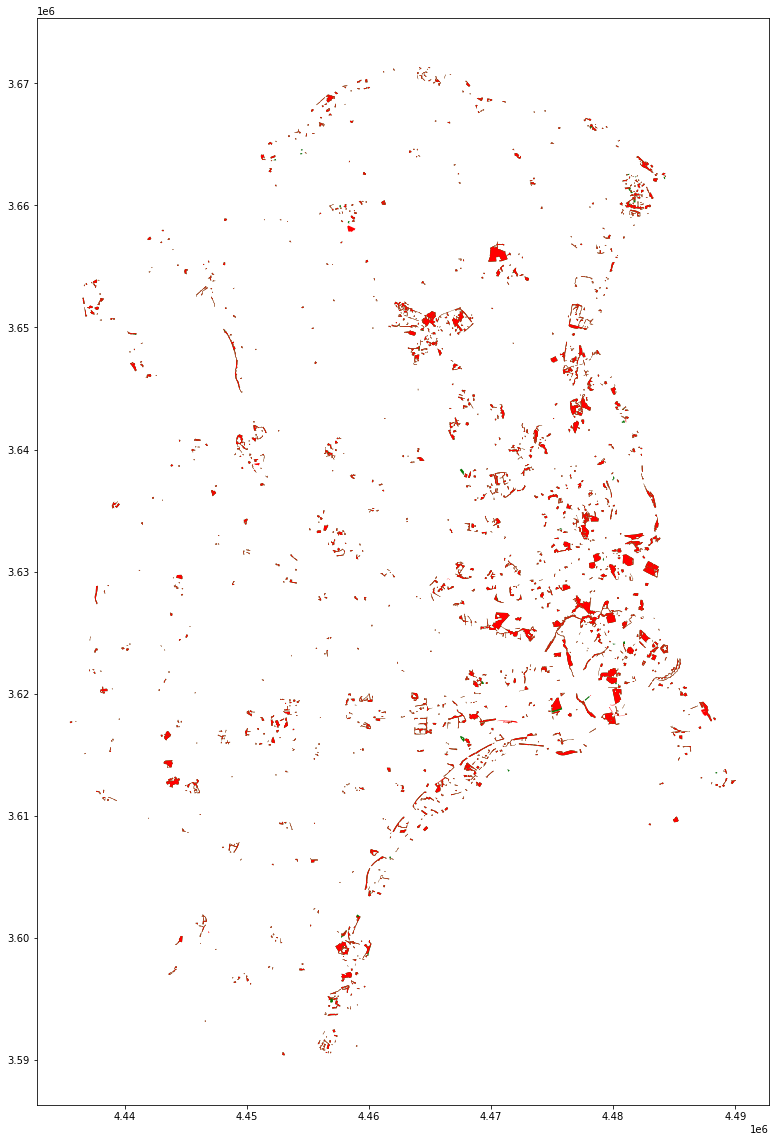

In [194]:
# Create a GeoDataFrame 
geo1 = gpd.GeoDataFrame([sel_green1.values], crs=dissolved1.crs, columns=dissolved1.columns) 
geo2 = gpd.GeoDataFrame([sel_green2.values], crs=dissolved2.crs, columns=dissolved2.columns) 


# Plot the grid cells that are green
ax = geo1.plot(facecolor='grey', figsize=(40, 20)) 
geo1.plot(ax=ax, facecolor='green') # green areas in 2006
geo2.plot(ax=ax, facecolor='red') # green areas in 2018

In [195]:
geo1

,geometry,COUNTRY,CITIES,FUA_OR_CIT,CODE2006,PROD_DATE,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((4456564.103 3590556.850, 44565...",DK,København,DK001L2,14100,2015,841.378955,32093.145943


In [196]:
green_diff = gpd.overlay(geo1, geo2, how='difference')

In [197]:
green_diff

,geometry,COUNTRY,CITIES,FUA_OR_CIT,CODE2006,PROD_DATE,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((4488515.079 3613561.714, 44885...",DK,København,DK001L2,14100,2015,841.378955,32093.145943


In [198]:
# let's update the area column ['Shape_Area'], because it was just copied from the geo1 layer and not based on the updated geometry 
green_diff['Shape_Area'] = green_diff['geometry'].area

In [199]:
green_diff

,geometry,COUNTRY,CITIES,FUA_OR_CIT,CODE2006,PROD_DATE,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((4488515.079 3613561.714, 44885...",DK,København,DK001L2,14100,2015,841.378955,954906.750655


<AxesSubplot:>

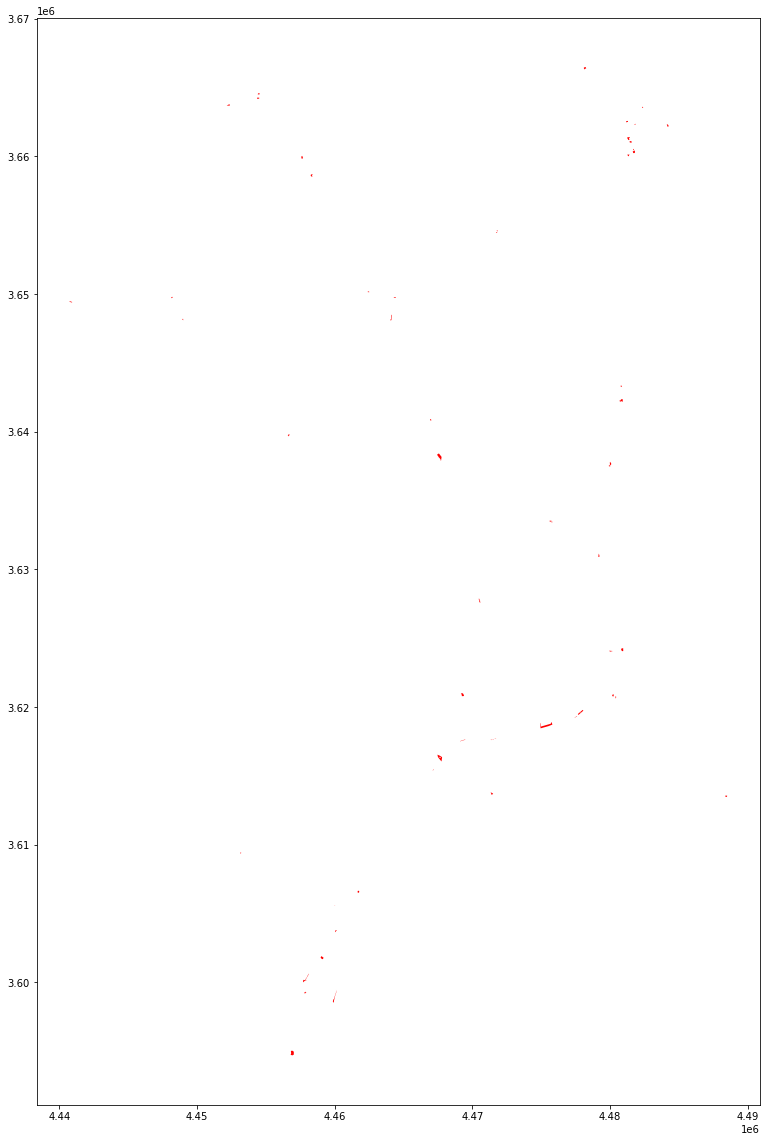

In [200]:
green_diff.plot(figsize=(40, 20), facecolor='red')


## 🏋 Exercise

let's try yo visualize the green change on an interactive map of Folium after finishing the Workshop_02.ipynb